In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [2]:
print(len(train_input[0]))
print(train_input[0])
print(train_target[:20])

218
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [3]:
from sklearn.model_selection import train_test_split

#메모리 부족으로 테스트 사이즈 줄임
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.9, random_state=42)


In [4]:
import numpy as np
lengts = np.array([len(x) for x in train_input])

In [5]:
print(np.mean(lengts), np.median(lengts))

239.00925 178.0


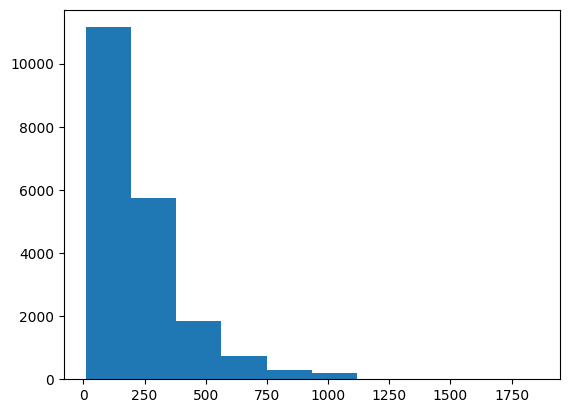

In [6]:
import matplotlib.pyplot as plt
plt.hist(lengts)
plt.show()

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
train_seq.shape

(20000, 100)

In [8]:
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [10]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)
print(train_oh[0])


(20000, 100, 500)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
val_oh = keras.utils.to_categorical(val_seq)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

#이대로 하면 메모리 부족으로 실행 안됨
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# history = model.fit(train_oh, train_target, epochs=100, batch_size=32, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 32ms/step - loss: 0.7002 - accuracy: 0.4978 - val_loss: 0.6953 - val_accuracy: 0.5056
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6945 - accuracy: 0.5151 - val_loss: 0.6927 - val_accuracy: 0.5202
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6917 - accuracy: 0.5247 - val_loss: 0.6912 - val_accuracy: 0.5302
Epoch 4/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6898 - accuracy: 0.5364 - val_loss: 0.6899 - val_accuracy: 0.5358
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6880 - accuracy: 0.5433 - val_loss: 0.6886 - val_accuracy: 0.5384
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6863 - accuracy: 0.5530 - val_loss: 0.6873 - val_accuracy: 0.5430
Epoch 7/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6844 - accuracy: 0.5603 - val_loss: 0.6862 - val_accuracy

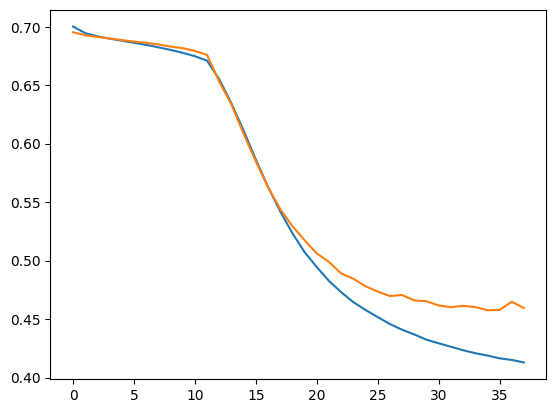

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [16]:

print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [18]:
model2 =keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [19]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 7s 18ms/step - loss: 0.6935 - accuracy: 0.5053 - val_loss: 0.6917 - val_accuracy: 0.5260
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6885 - accuracy: 0.5451 - val_loss: 0.6872 - val_accuracy: 0.5572
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6787 - accuracy: 0.5980 - val_loss: 0.6694 - val_accuracy: 0.6174
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6312 - accuracy: 0.6852 - val_loss: 0.6139 - val_accuracy: 0.7054
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5940 - accuracy: 0.7234 - val_loss: 0.5857 - val_accuracy: 0.7264
Epoch 6/100
313/313 [==============================] - 5s 14ms/step - loss: 0.5673 - accuracy: 0.7437 - val_loss: 0.5659 - val_accuracy: 0.7392
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5465 - accuracy: 0.7548 - val_loss: 0.5473 - val_accuracy:

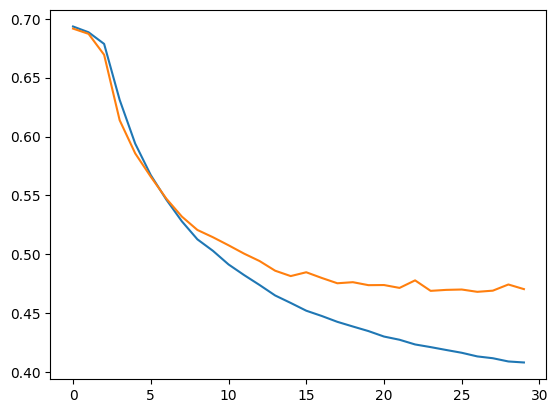

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [22]:
#메모리 부족으로 메모리 말고 다른 방법 찾아서 로컬에서 도전해보자....젠장

# ---------------------------------------------------------------------------
# InternalError                             Traceback (most recent call last)
# Cell In[16], line 8
#       4 early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
#       6 #이대로 하면 메모리 부족으로 실행 안됨
#       7 # history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# ----> 8 history = model.fit(train_oh, train_target, epochs=100, batch_size=32, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# File C:\ProgramData\Anaconda3\envs\39\lib\site-packages\keras\utils\traceback_utils.py:70, in filter_traceback.<locals>.error_handler(*args, **kwargs)
#      67     filtered_tb = _process_traceback_frames(e.__traceback__)
#      68     # To get the full stack trace, call:
#      69     # `tf.debugging.disable_traceback_filtering()`
# ---> 70     raise e.with_traceback(filtered_tb) from None
#      71 finally:
#      72     del filtered_tb

# File C:\ProgramData\Anaconda3\envs\39\lib\site-packages\tensorflow\python\framework\constant_op.py:102, in convert_to_eager_tensor(value, ctx, dtype)
#     100     dtype = dtypes.as_dtype(dtype).as_datatype_enum
#     101 ctx.ensure_initialized()
# --> 102 return ops.EagerTensor(value, ctx.device_name, dtype)

# InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.